<a href="https://colab.research.google.com/github/ulya1202/hand_detection/blob/main/Hands_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import matplotlib.image as mpimg
import zipfile
import shutil
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import numpy as np
import urllib.request
import pandas as pd
import pathlib
import random


In [ ]:
!curl -L -o sign-language-for-numbers.zip https://www.kaggle.com/api/v1/datasets/download/muhammadkhalid/sign-language-for-numbers

In [ ]:
!unzip /content/sign-language-for-numbers.zip

Streaming output truncated to the last 5000 lines.
  inflating: Sign Language for Numbers/7/seven_549.jpg  
  inflating: Sign Language for Numbers/7/seven_55.jpg  
  inflating: Sign Language for Numbers/7/seven_550.jpg  
  inflating: Sign Language for Numbers/7/seven_551.jpg  
  inflating: Sign Language for Numbers/7/seven_552.jpg  
  inflating: Sign Language for Numbers/7/seven_553.jpg  
  inflating: Sign Language for Numbers/7/seven_554.jpg  
  inflating: Sign Language for Numbers/7/seven_555.jpg  
  inflating: Sign Language for Numbers/7/seven_556.jpg  
  inflating: Sign Language for Numbers/7/seven_557.jpg  
  inflating: Sign Language for Numbers/7/seven_558.jpg  
  inflating: Sign Language for Numbers/7/seven_559.jpg  
  inflating: Sign Language for Numbers/7/seven_56.jpg  
  inflating: Sign Language for Numbers/7/seven_560.jpg  
  inflating: Sign Language for Numbers/7/seven_561.jpg  
  inflating: Sign Language for Numbers/7/seven_562.jpg  
  inflating: Sign Language for Numbers/

In [ ]:
try:
    shutil.rmtree('/content/Sign Language for Numbers/unknown')
except:
    print('bele bir qovluq yoxdu ve ya bashqa biir xeta')

In [ ]:
try:
    os.rename('/content/Sign Language for Numbers','/content/train_val')
except FileExistsError:
    print('file movcuddur')
except FileNotFoundError:
    print('bele bir fayl yoxdu')
except Exception as e:
    print(f'{e}')

# Extra Data

In [ ]:
!curl -L -o sign-language-dataset.zip https://www.kaggle.com/api/v1/datasets/download/kabilan03/sign-language-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 16.3M  100 16.3M    0     0  11.0M      0  0:00:01  0:00:01 --:--:-- 38.6M


In [ ]:
!unzip /content/sign-language-dataset.zip

Archive:  /content/sign-language-dataset.zip
  inflating: Sign Language Dataset/0/IMG_1118.JPG  
  inflating: Sign Language Dataset/0/IMG_1128.JPG  
  inflating: Sign Language Dataset/0/IMG_1138.JPG  
  inflating: Sign Language Dataset/0/IMG_1148.JPG  
  inflating: Sign Language Dataset/0/IMG_1158.JPG  
  inflating: Sign Language Dataset/0/IMG_1169.JPG  
  inflating: Sign Language Dataset/0/IMG_1179.JPG  
  inflating: Sign Language Dataset/0/IMG_1189.JPG  
  inflating: Sign Language Dataset/0/IMG_1199.JPG  
  inflating: Sign Language Dataset/0/IMG_1209.JPG  
  inflating: Sign Language Dataset/0/IMG_1219.JPG  
  inflating: Sign Language Dataset/0/IMG_1229.JPG  
  inflating: Sign Language Dataset/0/IMG_1239.JPG  
  inflating: Sign Language Dataset/0/IMG_1249.JPG  
  inflating: Sign Language Dataset/0/IMG_1260.JPG  
  inflating: Sign Language Dataset/0/IMG_1270.JPG  
  inflating: Sign Language Dataset/0/IMG_1280.JPG  
  inflating: Sign Language Dataset/0/IMG_1290.JPG  
  inflating: Sign L

In [ ]:
try:
    os.rename('/content/Sign Language Dataset','/content/test')
except FileExistsError:
    print('file movcuddur')
except FileNotFoundError:
    print('bele bir fayl yoxdu')
except Exception as e:
    print(f'{e}')

# **Functions**

In [ ]:
def exampels_per_dir(dataset_path, only_df=False):
    x_=[]
    y_=[]

    for dirpath, dirnames,filenames in os.walk(dataset_path):
        x_.append(os.path.basename(dirpath))
        y_.append(len(filenames))
        print(f'There are{len(dirnames)} directories and {len(filenames)} images in {os.path.basename(dirpath)}')
    our_dist=pd.DataFrame({'state':x_,'count':y_}).set_index('state')
    if only_df:
        return our_dist

    return x_,y_

In [ ]:
def plot_classes_shape_dimensions(dataset_dir, shape_2d=False):
    classes=os.listdir(dataset_dir)
    class_shape_di={}
    in_this_class_have_2d={}
    plt.figure(figsize=(20,20))
    for i, clas in enumerate(classes):
        class_path=os.path.join(dataset_dir,clas)
        images_of_class=os.listdir(class_path)
        class_shape_di[clas] = class_shape_di.get(clas, {})  #gemini komeketdi bu setre
        h=[]
        w=[]
        d=[]
        g_s_img=[]
        for i_,img_name in enumerate(images_of_class):
            img_of_class_p=os.path.join(class_path,img_name)
            image_of_class=mpimg.imread(img_of_class_p)
            h.append(image_of_class.shape[0])
            w.append(image_of_class.shape[1])
            if len(image_of_class.shape) == 3:
                d.append(image_of_class.shape[2])
            else:
                d.append(0)
                g_s_img.append(img_name)
                in_this_class_have_2d[clas]=g_s_img

            if i_+1==len(images_of_class):
                m_w=(sum(w)/len(w))
                m_h=(sum(h)/len(h))
                m_d=(sum(d)/len(d))
                h=[]
                w=[]
                d=[]
                continue


        class_shape_di[clas]['h']=m_h
        class_shape_di[clas]['w']=m_w
        class_shape_di[clas]['color']=m_d

        random_img=random.sample(images_of_class,1)
        img_dir=os.path.join(class_path,random_img[0])
        image=mpimg.imread(img_dir)
        plt.subplot(int(np.ceil(len(classes)**0.5)),int(np.ceil(len(classes)**0.5)),i+1)
        plt.imshow(image/255.)
        plt.title(clas, fontsize=8)
        plt.axis('off')
    if shape_2d:
        return class_shape_di,in_this_class_have_2d
    return


In [ ]:
def plot_aug(aug,train_data,classes):
    plt.figure(figsize=(20,20))
    for images,labels in (train_data.take(1)):
        aug_images=aug(images)
        if batch_size<50:
            for i in range(batch_size):
                plt.subplot(int(np.ceil(batch_size**0.5)),int(np.ceil(batch_size**0.5)),i+1)
                plt.imshow(aug_images[i].numpy().astype("uint8"))
                class_index_in_one_hot=labels.numpy().astype('int')[i]
                class_index=np.argmax(class_index_in_one_hot)
                plt.title(classes[class_index])
                plt.axis('off')

In [ ]:
def to_rgb(image,label):
    image=tf.image.grayscale_to_rgb(image)
    return (image,label)

# EDA

In [ ]:
df=exampels_per_dir('/content/train_val', only_df=True)

There are10 directories and 0 images in train_val
There are0 directories and 1500 images in 1
There are0 directories and 1500 images in 3
There are0 directories and 1500 images in 7
There are0 directories and 1500 images in 5
There are0 directories and 1500 images in 9
There are0 directories and 1500 images in 0
There are0 directories and 1500 images in 4
There are0 directories and 1500 images in 6
There are0 directories and 1500 images in 2
There are0 directories and 1500 images in 8


In [ ]:
df2=exampels_per_dir('/content/test', only_df=True)

There are10 directories and 0 images in test
There are0 directories and 206 images in 1
There are0 directories and 206 images in 3
There are0 directories and 206 images in 7
There are0 directories and 207 images in 5
There are0 directories and 204 images in 9
There are0 directories and 205 images in 0
There are0 directories and 207 images in 4
There are0 directories and 207 images in 6
There are0 directories and 206 images in 2
There are0 directories and 208 images in 8


In [ ]:
df

,count
state,
train_val,0
1,1500
3,1500
7,1500
5,1500
9,1500
0,1500
4,1500
6,1500


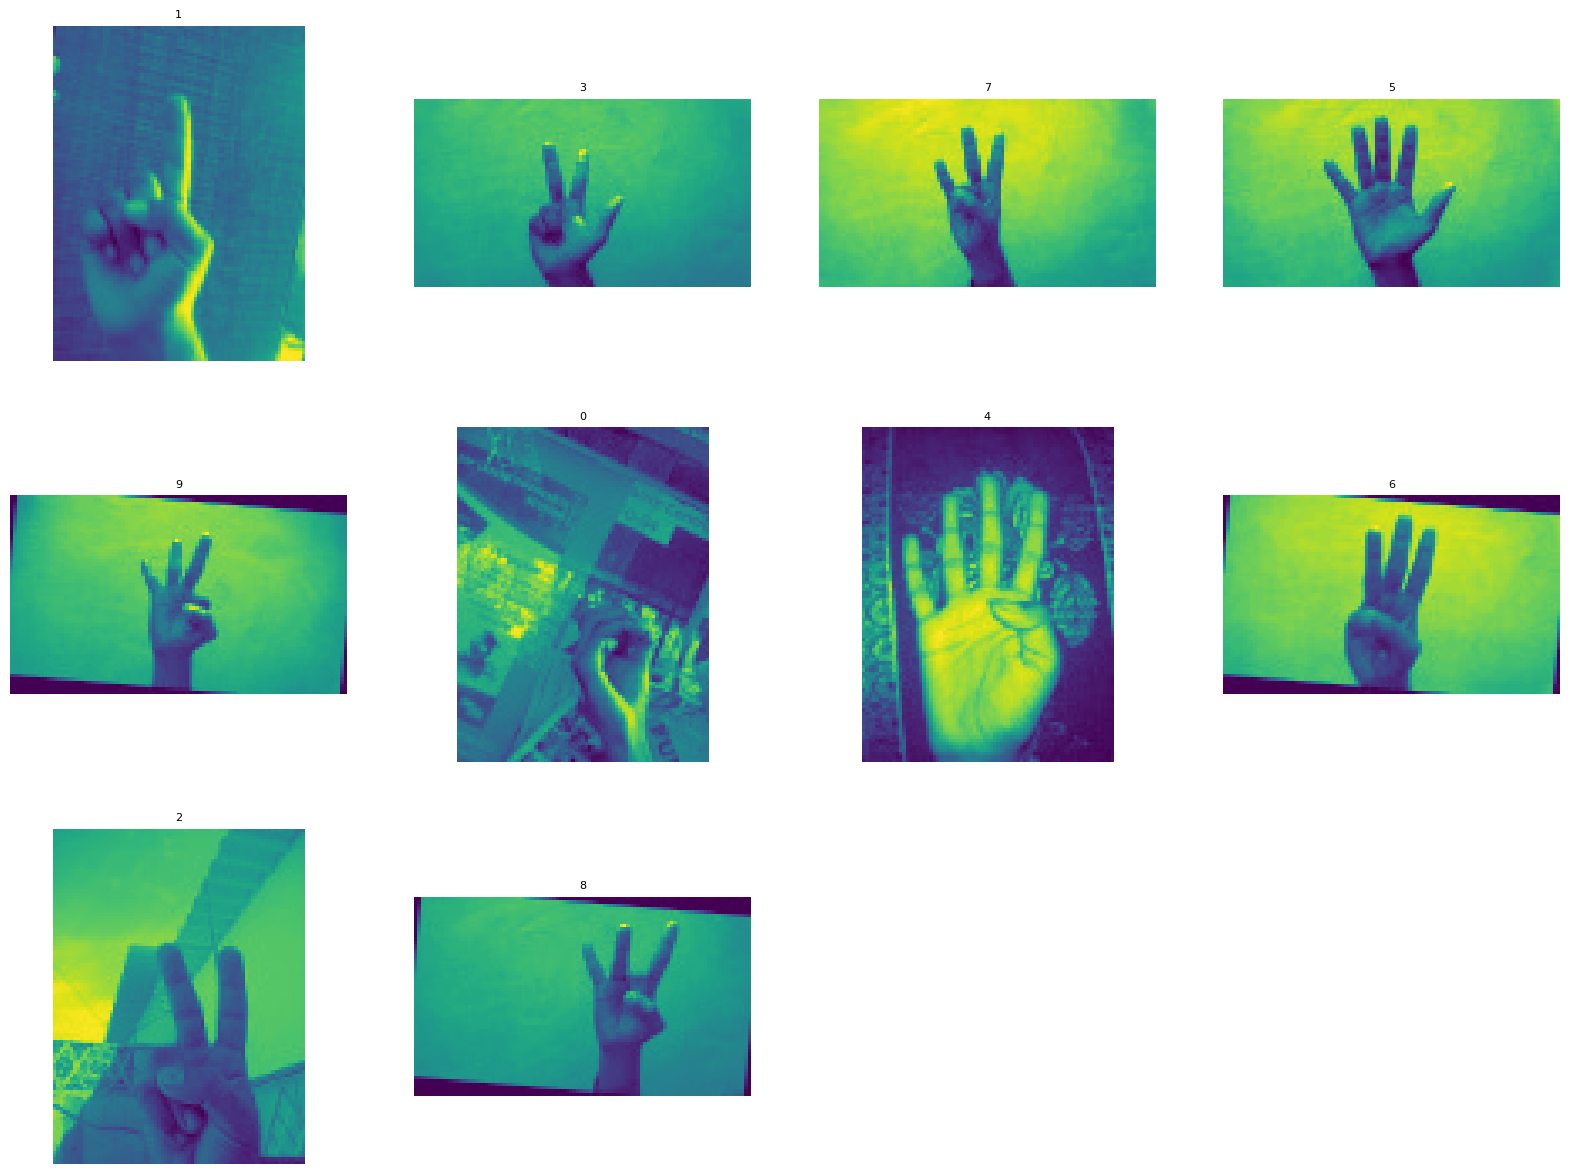

In [ ]:
shp, td=plot_classes_shape_dimensions('/content/train_val', shape_2d=True)

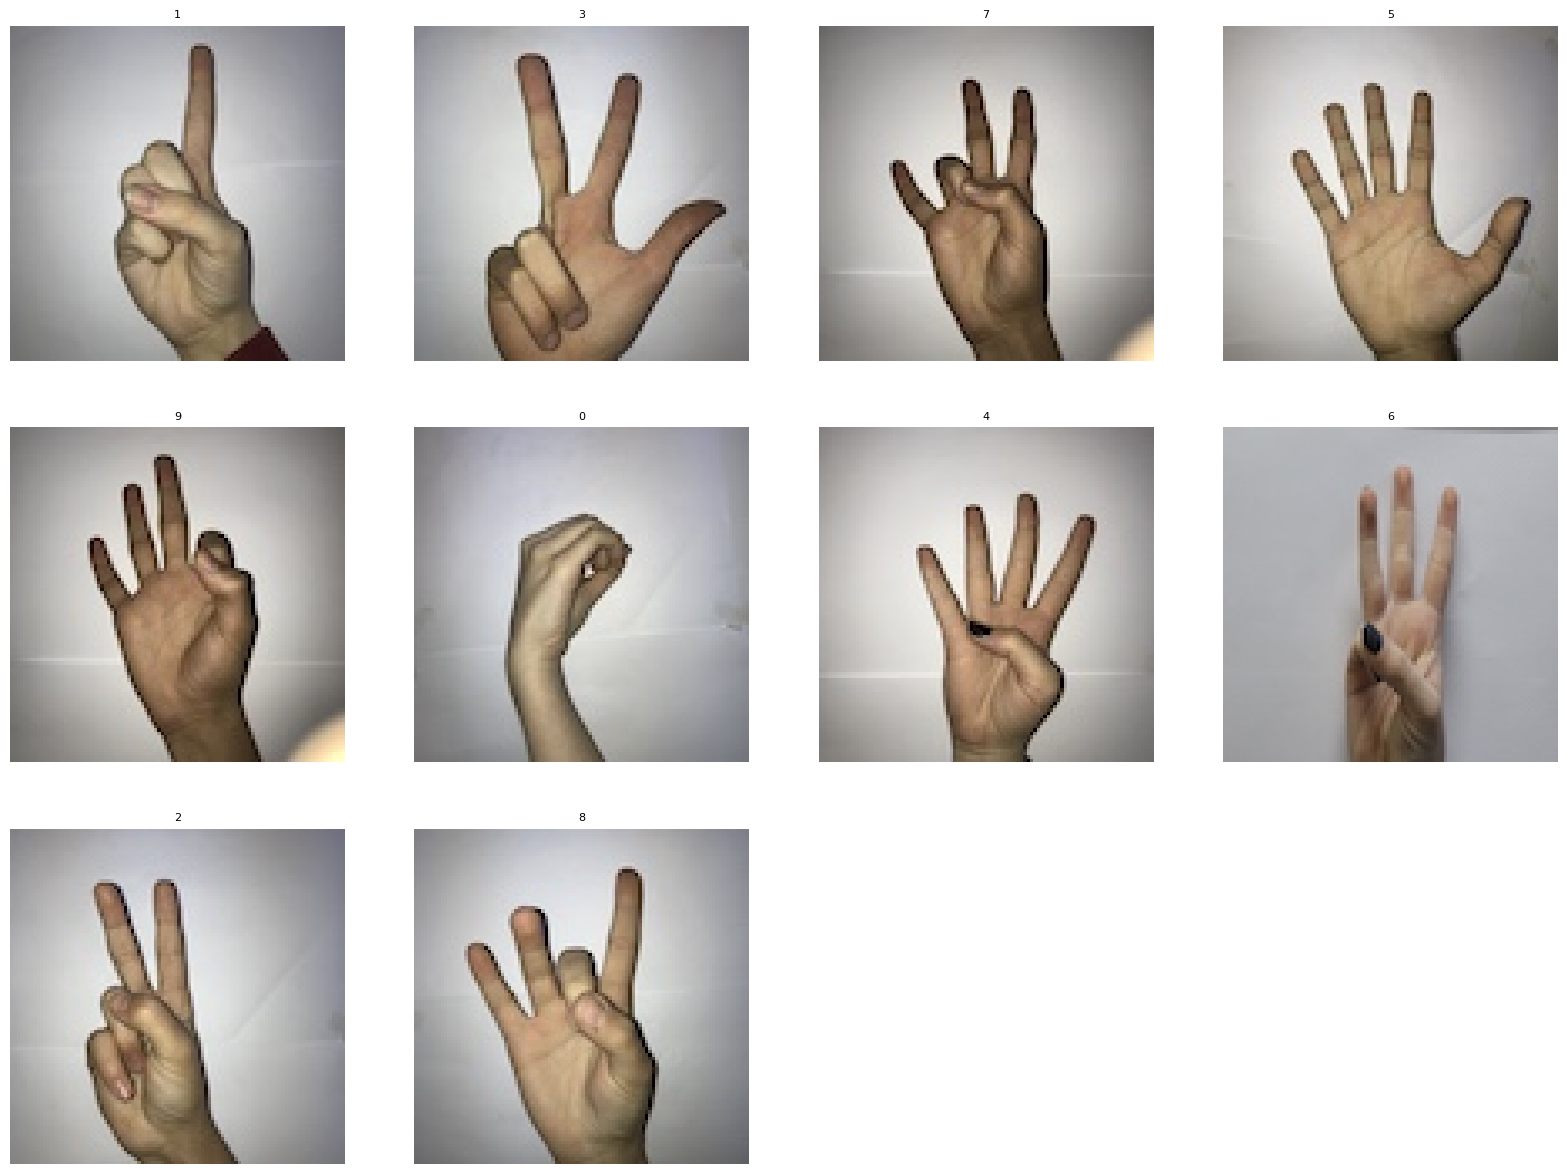

In [ ]:
shp, td=plot_classes_shape_dimensions('/content/test', shape_2d=True)

In [ ]:
shp

{'1': {'h': 100.0, 'w': 100.0, 'color': 3.0},
 '3': {'h': 100.0, 'w': 100.0, 'color': 3.0},
 '7': {'h': 142.58252427184465, 'w': 142.58252427184465, 'color': 3.0},
 '5': {'h': 100.0, 'w': 100.0, 'color': 3.0},
 '9': {'h': 100.0, 'w': 100.0, 'color': 3.0},
 '0': {'h': 100.0, 'w': 100.0, 'color': 3.0},
 '4': {'h': 100.0, 'w': 100.0, 'color': 3.0},
 '6': {'h': 100.0, 'w': 100.0, 'color': 3.0},
 '2': {'h': 100.0, 'w': 100.0, 'color': 3.0},
 '8': {'h': 100.0, 'w': 100.0, 'color': 3.0}}

#Data Load

In [ ]:
IMG_SIZE=(224,224)
batch_size=32
train_val_d='/content/train_val'
test_d='/content/test'
classes=sorted(os.listdir('/content/train_val'))


train_data=tf.keras.utils.image_dataset_from_directory(
    train_val_d,
    label_mode='categorical',
    image_size=IMG_SIZE,
    crop_to_aspect_ratio=True,
    subset='training',
    validation_split=0.2,
    seed=42   #########seed onemlidi
)
val_data=tf.keras.utils.image_dataset_from_directory(
    train_val_d,
    label_mode='categorical',
    image_size=IMG_SIZE,
    crop_to_aspect_ratio=True,
    subset='validation',
    validation_split=0.2,
    seed=42    ##############seed olmalida ##mentiqle 3 hisseye olar bolmek
)

test_data=tf.keras.utils.image_dataset_from_directory(
    test_d,
    label_mode='categorical',
    image_size=IMG_SIZE,
    crop_to_aspect_ratio=True,
    seed=42    ##############seed olmalida ##mentiqle 3 hisseye olar bolmek
)



Found 15000 files belonging to 10 classes.
Using 12000 files for training.
Found 15000 files belonging to 10 classes.
Using 3000 files for validation.
Found 2062 files belonging to 10 classes.


# To-rgb

In [ ]:
def to_rgb(image,label):
    if image.shape[-1]!=3:
        image=tf.image.grayscale_to_rgb(image)
    return (image,label)

In [ ]:
train_data.map(to_rgb)

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
val_data.map(to_rgb)

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

# Augumentation

In [ ]:
aug2=tf.keras.Sequential([

    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomBrightness(0.3),
    tf.keras.layers.RandomContrast(0.3)
])

# Visiual of aug

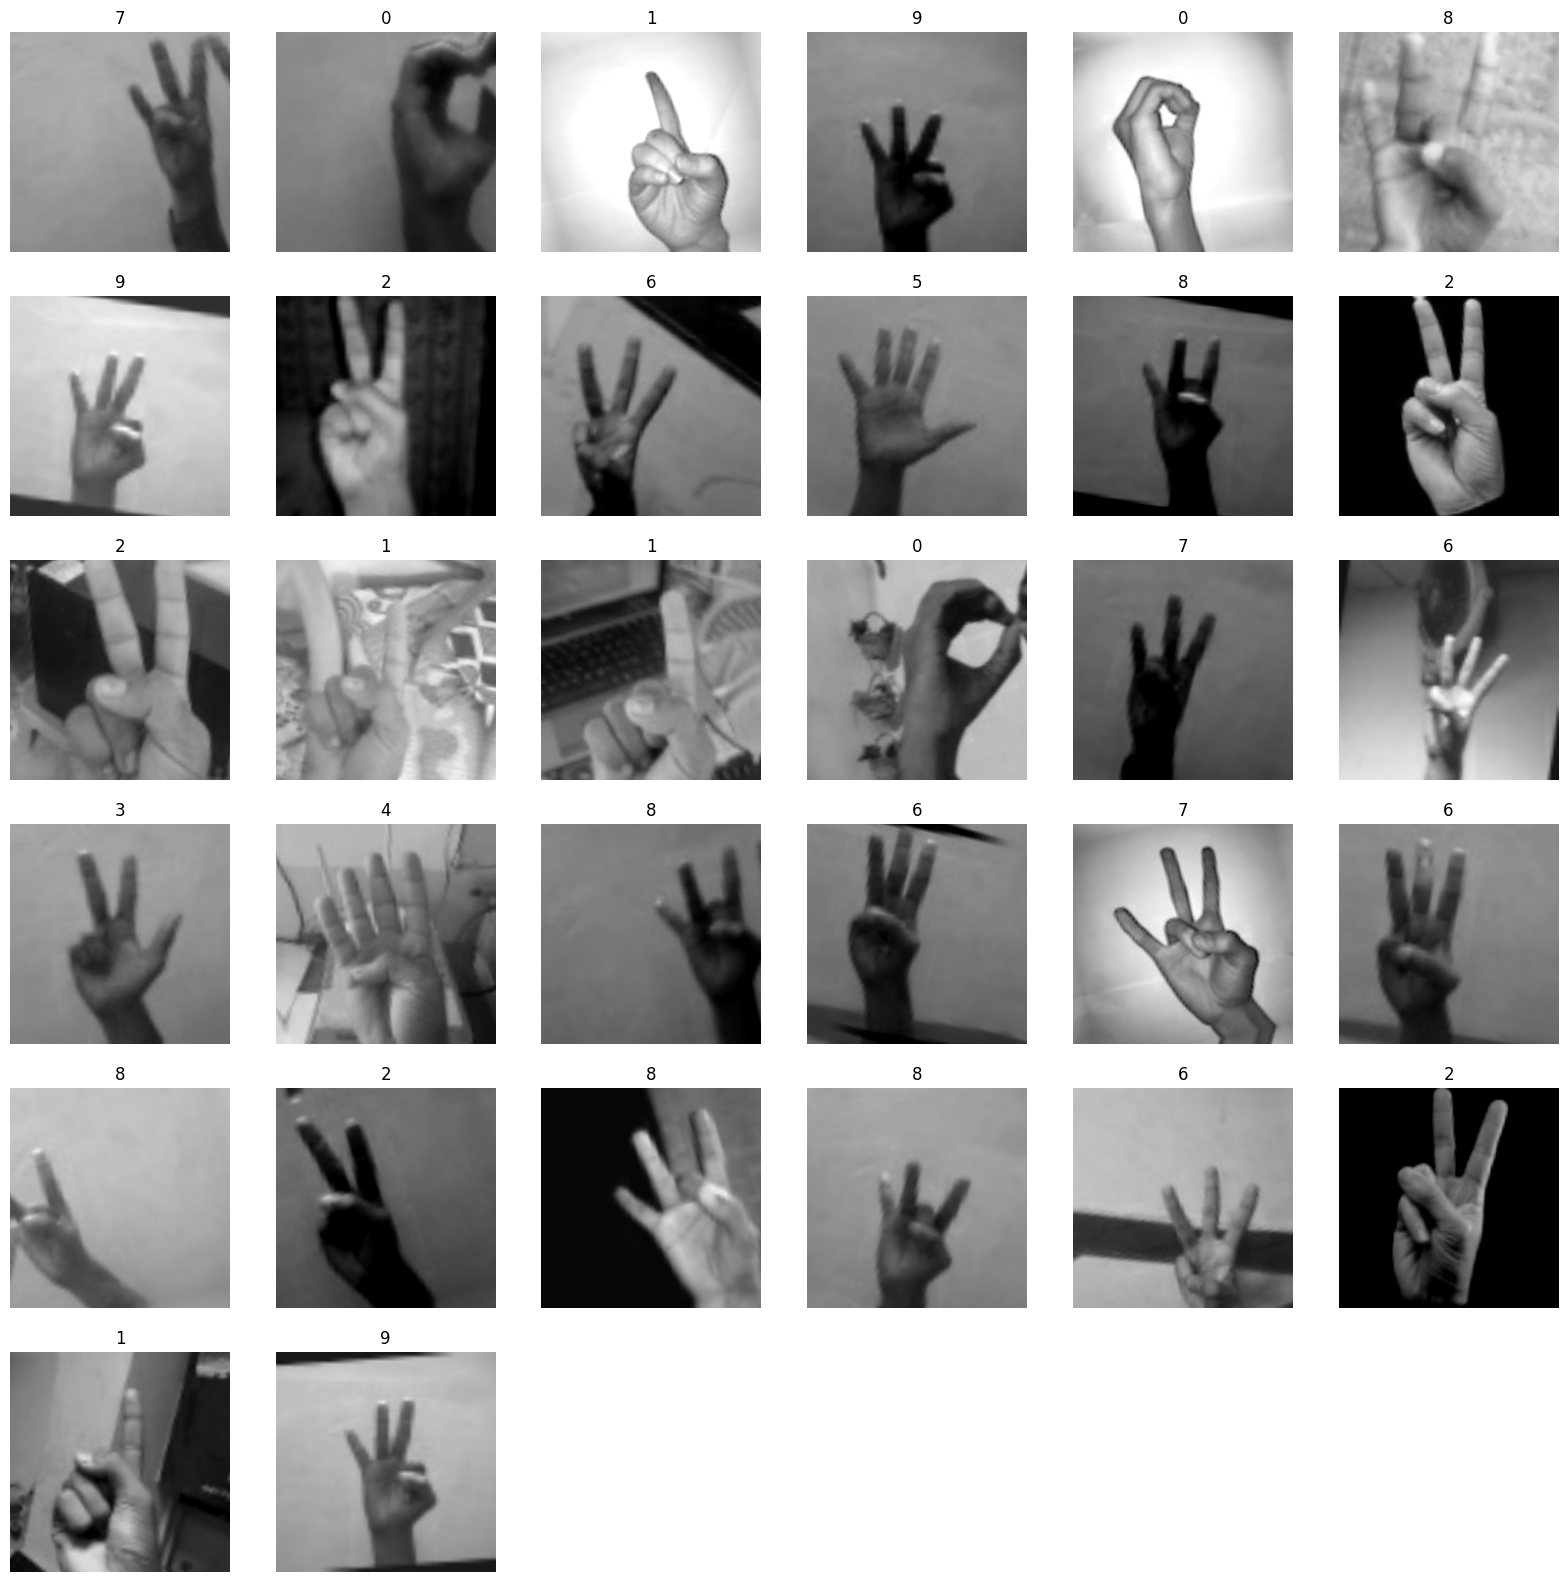

In [ ]:
plot_aug(aug2, train_data, classes=classes)

# Model

In [ ]:
input=tf.keras.layers.Input(shape=[224,224,3])
aug=aug2(input)
prep=tf.keras.layers.Lambda(tf.keras.applications.efficientnet.preprocess_input)(aug)
base_model_ef=tf.keras.applications.EfficientNetB5( include_top=False, input_tensor=prep)
base_model_ef.trainable = False

avg=tf.keras.layers.GlobalAveragePooling2D()(base_model_ef.output)

output=tf.keras.layers.Dense(units=10, activation='sigmoid')(avg)


model=tf.keras.Model(inputs=input, outputs=output)

# callbacks

In [ ]:
import os

initial_learning_rate=0.001
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=47, #her 47 addim dan bir yeni her epoksdan bir
    decay_rate=0.96
)

early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=3,
                                                restore_best_weights=True)
model_ckpt = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True
)

In [ ]:
optimizer=tf.keras.optimizers.Adam(lr_schedule)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy','f1_score',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(), tf.keras.metrics.AUC(name='auroc')])

In [ ]:
model.fit(train_data, epochs=20, validation_data=val_data, callbacks=[early_stopping, model_ckpt])

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 137s 366ms/step - accuracy: 0.9427 - auroc: 0.9828 - f1_score: 0.9419 - loss: 0.1866 - precision: 0.2585 - recall: 0.9983 - val_accuracy: 0.9457 - val_auroc: 0.9832 - val_f1_score: 0.9468 - val_loss: 0.1791 - val_precision: 0.2489 - val_recall: 0.9967
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 142s 365ms/step - accuracy: 0.9483 - auroc: 0.9840 - f1_score: 0.9479 - loss: 0.1741 - precision: 0.2582 - recall: 0.9990 - val_accuracy: 0.9447 - val_auroc: 0.9837 - val_f1_score: 0.9458 - val_loss: 0.1791 - val_precision: 0.2483 - val_recall: 0.9967
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 137s 366ms/step - accuracy: 0.9483 - auroc: 0.9845 - f1_score: 0.9475 - loss: 0.1676 - precision: 0.2579 - recall: 0.9973 - val_accuracy: 0.9480 - val_auroc: 0.9840 - val_f1_score: 0.9491 - val_loss: 0.1711 - val_precision: 0.2499 - val_recall: 0.9973
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 122s 313ms/step - accuracy: 0.9568 - auroc: 0.9848 - f1_score: 0.9565 - loss: 0.1519

In [ ]:
model.load_weights('/content/best_model.weights.h5')

In [ ]:
model.evaluate(test_data)

65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.7107 - auroc: 0.9270 - f1_score: 0.6826 - loss: 0.8606 - precision: 0.1770 - recall: 0.9907


[0.8754045367240906,
 0.7036857604980469,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([1.        , 0.89544225, 0.8054919 , 0.5144291 , 0.8069306 ,
        0.8912466 , 0.7769028 , 0.08144795, 0.27999997, 0.7383966 ],
       dtype=float32)>,
 0.17643004655838013,
 0.99321049451828,
 0.9252004623413086]

In [ ]:
for layers in base_model_ef.layers[-5:]:
    layers.trainable=True

In [ ]:
model.load_weights('/content/best_model.weights.h5')

In [ ]:
initial_learning_rate=0.00001
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=47, #her 47 addim dan bir yeni her epoksdan bir
    decay_rate=0.96
)


In [ ]:
optimizer=tf.keras.optimizers.Adam(lr_schedule)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy','f1_score',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(), tf.keras.metrics.AUC(name='auroc')])

In [ ]:
model.fit(train_data, epochs=3, validation_data=val_data, callbacks=[early_stopping, model_ckpt])

Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 176s 384ms/step - accuracy: 0.9821 - auroc: 0.9751 - f1_score: 0.9812 - loss: 0.0595 - precision_6: 0.2830 - recall_6: 0.9997 - val_accuracy: 0.9833 - val_auroc: 0.9762 - val_f1_score: 0.9836 - val_loss: 0.0581 - val_precision_6: 0.3036 - val_recall_6: 1.0000
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 174s 311ms/step - accuracy: 0.9848 - auroc: 0.9752 - f1_score: 0.9840 - loss: 0.0583 - precision_6: 0.2841 - recall_6: 0.9993 - val_accuracy: 0.9833 - val_auroc: 0.9765 - val_f1_score: 0.9836 - val_loss: 0.0591 - val_precision_6: 0.3036 - val_recall_6: 1.0000
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 120s 319ms/step - accuracy: 0.9838 - auroc: 0.9754 - f1_score: 0.9837 - loss: 0.0567 - precision_6: 0.2855 - recall_6: 0.9993 - val_accuracy: 0.9837 - val_auroc: 0.9767 - val_f1_score: 0.9836 - val_loss: 0.0584 - val_precision_6: 0.3040 - val_recall_6: 1.0000


In [ ]:
model.fit(train_data, epochs=10, validation_data=val_data, callbacks=[early_stopping, model_ckpt])

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 115s 307ms/step - accuracy: 0.9881 - auroc: 0.9766 - f1_score: 0.9877 - loss: 0.0426 - precision_2: 0.2849 - recall_2: 0.9997 - val_accuracy: 0.9837 - val_auroc: 0.9757 - val_f1_score: 0.9840 - val_loss: 0.0575 - val_precision_2: 0.2978 - val_recall_2: 1.0000
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 136s 362ms/step - accuracy: 0.9893 - auroc: 0.9768 - f1_score: 0.9888 - loss: 0.0339 - precision_2: 0.2874 - recall_2: 0.9999 - val_accuracy: 0.9840 - val_auroc: 0.9757 - val_f1_score: 0.9843 - val_loss: 0.0581 - val_precision_2: 0.2994 - val_recall_2: 1.0000
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 136s 363ms/step - accuracy: 0.9895 - auroc: 0.9762 - f1_score: 0.9890 - loss: 0.0337 - precision_2: 0.2853 - recall_2: 0.9999 - val_accuracy: 0.9837 - val_auroc: 0.9759 - val_f1_score: 0.9840 - val_loss: 0.0577 - val_precision_2: 0.2995 - val_recall_2: 1.0000
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 142s 364ms/step - accuracy: 0.9909 - auroc: 0.9762 - f1_scor

# Error analysis

In [ ]:
model.load_weights('/content/best_model.weights.h5')

In [ ]:
model.evaluate(test_data)

65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 254ms/step - accuracy: 0.8505 - auroc: 0.9485 - f1_score: 0.8465 - loss: 0.4282 - precision_8: 0.2313 - recall_8: 0.9942


[0.4499000906944275,
 0.8433559536933899,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([1.        , 0.98771495, 0.8883928 , 0.68676716, 0.91891885,
        0.87499994, 0.89749426, 0.5822784 , 0.67901224, 0.90602404],
       dtype=float32)>,
 0.22996866703033447,
 0.9966052174568176,
 0.94922935962677]

In [ ]:
y_pred=np.argmax(model.predict(test_data), axis=1)

65/65 ━━━━━━━━━━━━━━━━━━━━ 26s 309ms/step


In [ ]:
y_pred_val=np.argmax(model.predict(val_data), axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 235ms/step


In [ ]:
y_true=[]
for images , labels in test_data:
  for label in labels:
    y_true.append(np.argmax(label))

y_true_val=np.array(y_true)

In [ ]:
y_true_val=[]
for images , labels in val_data:
  for label in labels:
    y_true_val.append(np.argmax(label))

y_true_val=np.array(y_true_val)

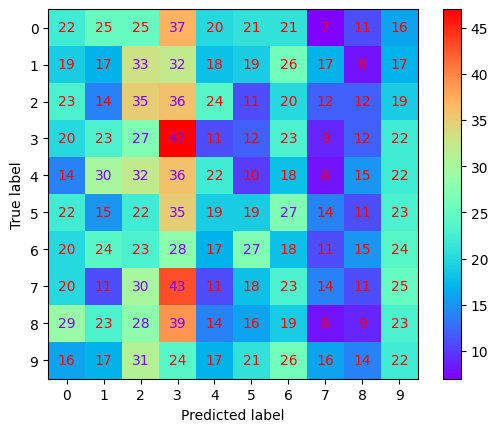

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay # Import the ConfusionMatrixDisplay class
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=classes, cmap='rainbow')

In [ ]:
from tensorflow import keras
loaded_model = keras.models.load_model('my_model.keras')

ValueError: File not found: filepath=my_model.keras. Please ensure the file is an accessible `.keras` zip file.